# COVID Cases UK Example

A short example to show how useful Python is in data analysis - before we start on the basics.  We will import a CSV file into a dataset and plot a  time-series chart.


In [19]:
# Import the modules
import pandas as pd
import matplotlib.pyplot as plt

# Load our data from  CSV file 
df_uk= pd.read_csv("Datasets/COVID Cases UK.csv", parse_dates = ['date'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   areaType               1800 non-null   object        
 1   areaName               1800 non-null   object        
 2   areaCode               1800 non-null   object        
 3   date                   1800 non-null   datetime64[ns]
 4   newCasesByPublishDate  1800 non-null   int64         
 5   cumCasesByPublishDate  1594 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 84.5+ KB


<AxesSubplot:xlabel='Country'>

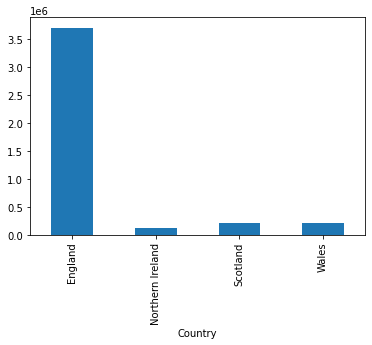

In [20]:
df_uk.columns
df_uk.info()
df_uk = df_uk.drop(['areaType', 'areaCode'], axis=1)
df_uk.columns = ('Country', 'Date', 'Cases', 'CumulativeCases')

df_uk.groupby('Country').sum().Cases.plot(kind='bar')

<AxesSubplot:xlabel='Date'>

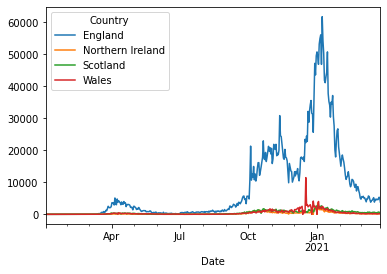

In [4]:
df_uk_wide = df_uk.pivot(index = 'Date', columns='Country', values='Cases')
df_uk_wide.plot()


##  England only analysis

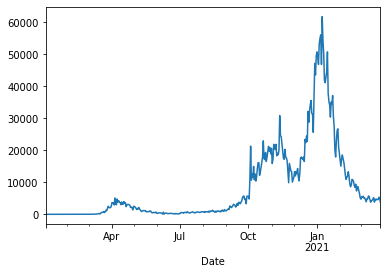

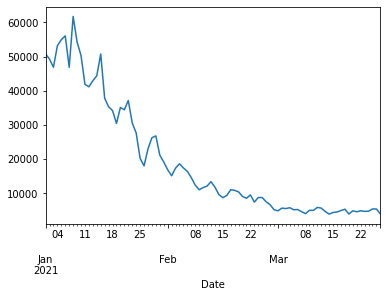

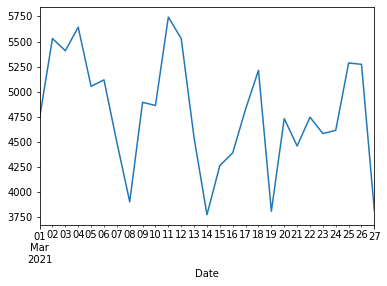

In [21]:
df_eng = df_uk.loc[df_uk.Country == 'England']
df_eng = df_eng.set_index('Date')
df_eng = df_eng.sort_index()

df_eng.Cases.plot()
plt.show()

df_eng.loc['2021','Cases'].plot()  # Show 2021 year only
plt.show()

df_eng.loc['2021-03','Cases'].plot()  # Show March 2021  only
plt.show()

#df_eng.index.values.max() # - what is the latest date for which there is data?
